- Ejemplo Series de Fourier
$$
g(x)= 
\left\{
\begin{array}{ll}
0 & \mbox{si  }  -\pi <x<0\\
\pi-x & \mbox{si  }  0 <x<\pi\\
& \mbox{estendida con periodo } 2\pi
\end{array}\\
\right. 
$$

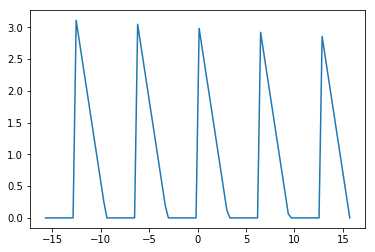

In [1]:
import numpy as np

#Metodo para evaluar la función periódica
def f(x):
    a=-np.pi
    b=np.pi
    interval=b-a
    s=(x - a) % interval + a
    return 0*(s<0)+(np.pi-s)*(s>=0)

x = np.linspace(-5*np.pi, 5*np.pi,100)
y=f(x)
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(x,f(x))

1
sin(x) + sin(2*x)/2 + sin(3*x)/3 + sin(4*x)/4 + sin(5*x)/5 + sin(6*x)/6 + sin(7*x)/7 + sin(8*x)/8 + sin(9*x)/9 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 2*cos(5*x)/(25*pi) + 2*cos(7*x)/(49*pi) + 2*cos(9*x)/(81*pi) + 0.25*pi


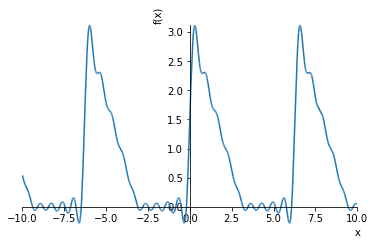

In [2]:
import sympy as sp
x=sp.symbols('x')
g1=0
g2=sp.pi-x
T=2*sp.pi
w=2*sp.pi/T
print(w)
a0=2/T * (sp.integrate(g1,(x,-sp.pi,0))+sp.integrate(g2,(x,0,sp.pi)))
serie=a0/2.
n=10
lserie=[]
for k in range(1,n):
    ak=2/T* (sp.integrate(g1*sp.cos(k*w*x),(x,-sp.pi,0))+sp.integrate(g2*sp.cos(k*w*x),(x,0,sp.pi)))
    bk=2/T* (sp.integrate(g1*sp.sin(k*w*x),(x,-sp.pi,0))+sp.integrate(g2*sp.sin(k*w*x),(x,0,sp.pi)))
    serie+=ak*sp.cos(k*w*x)+bk*sp.sin(k*w*x)
    lserie.append(serie)
print(serie)
from sympy.plotting import plot
plot(serie)

- La serie la podemos representar en Sympy, pero es complicado representarla sobre la propia función, para ver cómo la serie de Fourier aproxima la función
- Por esta razón la vamos a pasar la "serie" a una función que no sea simbólica

In [3]:
gserie=sp.lambdify(x,serie)
gseries=np.vectorize(gserie)

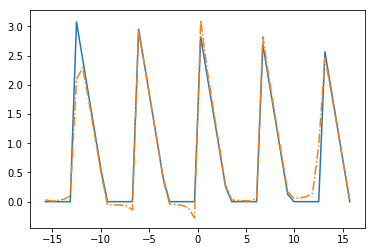

In [4]:
y = np.linspace(-5*np.pi, 5*np.pi)

plt.plot(y,f(y))
plt.plot(y,gseries(y),'-.')

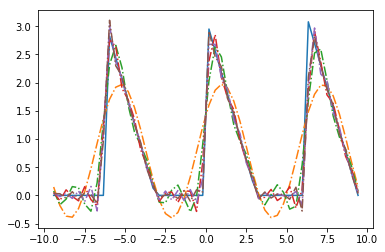

In [5]:
y = np.linspace(-3*np.pi, 3*np.pi)
plt.plot(y,f(y))
m=len(lserie)

for k in range(0,m,2):
    serie_k=lserie[k]
    gserie_k=sp.lambdify(x,serie_k)
    gseries_k=np.vectorize(gserie_k)
    plt.plot(y,gseries_k(y),'-.')
    


    